In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("train_salary.csv")
df

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [4]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [5]:
df1=df.copy() 
df1.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [6]:
df1.columns=df1.columns.str.strip()
df1.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
df1=df1.drop('GrossPay',axis=1)
df1=df1.dropna(subset=['HireDate'])
df1.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [8]:
df1['AnnualSalary']=df1['AnnualSalary'].apply(lambda x : float(str(x)[1:]))

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18911 entries, 0 to 18980
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.0+ MB


In [10]:
df1['Month']=df1['HireDate'].apply(lambda x: int(str(x)[0:2]))
df1['Day']=df1['HireDate'].apply(lambda x: int(str(x)[3:5]))
df1['Year']=df1['HireDate'].apply(lambda x: int(str(x)[6:]))
df1=df1.drop(['HireDate'],axis=1)

In [11]:
df1

,Name,JobTitle,AgencyID,Agency,AnnualSalary,Month,Day,Year
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,44104.0,1,23,2013


In [12]:
#EXPLORATORY DATA ANALYSIS

In [13]:
df1.JobTitle.value_counts()

JobTitle
AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: count, Length: 1073, dtype: int64

In [14]:
df1.Agency.value_counts()

Agency
Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: count, Length: 65, dtype: int64

In [15]:
df1.AgencyID.value_counts()

AgencyID
P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: count, Length: 1177, dtype: int64

<Axes: >

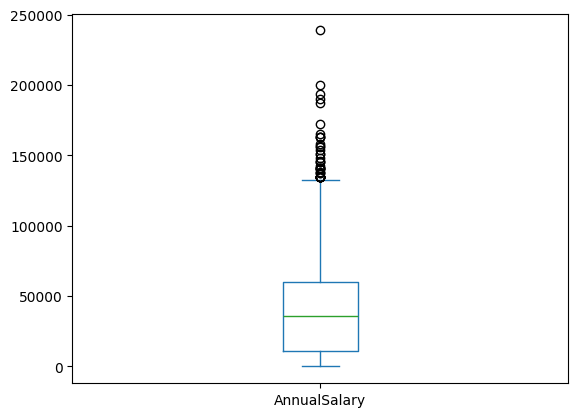

In [16]:
df1.AnnualSalary.plot.box()

In [17]:
df1[df1['AnnualSalary']>140000].shape

(25, 8)

In [18]:
final=df1[df1['AnnualSalary']<140000]

In [19]:
final.shape

(18885, 8)

<Axes: >

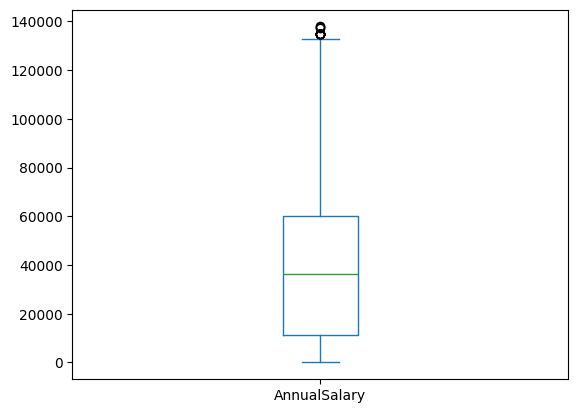

In [20]:
final.AnnualSalary.plot.box()

/var/folders/rk/p2f3sgbd0b3bn4zn4_gp26vw0000gn/T/ipykernel_32856/1560396519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final.AnnualSalary)


<Axes: xlabel='AnnualSalary', ylabel='Density'>

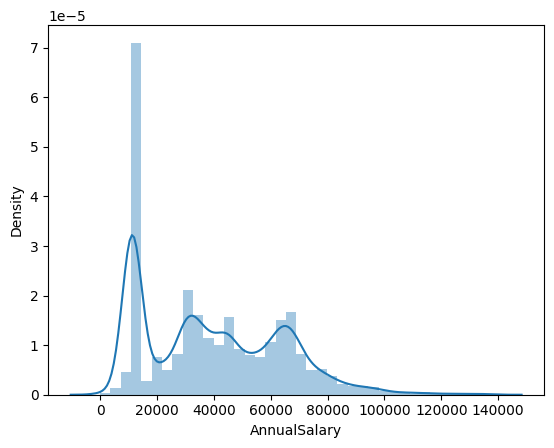

In [21]:
sns.distplot(final.AnnualSalary)

In [22]:
#top 10 most hiring jobs

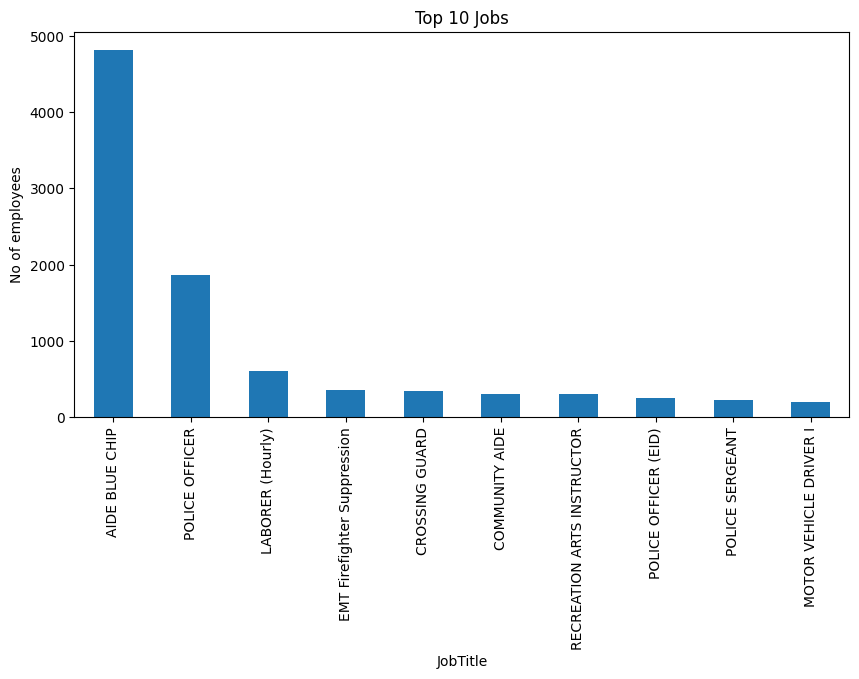

In [23]:
plt.figure(figsize=(10,5))
final.groupby(['JobTitle'])['JobTitle'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of employees')
plt.xticks(rotation=90)
plt.title('Top 10 Jobs')
plt.show()

In [24]:
#top 10 highest paying jobs

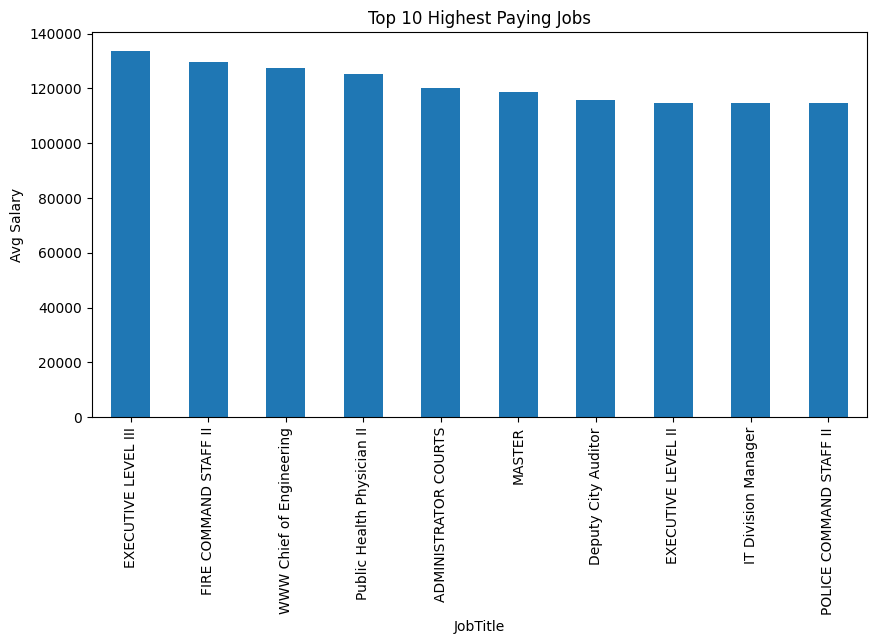

In [25]:
plt.figure(figsize=(10,5))
final.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.xticks(rotation=90)
plt.title('Top 10 Highest Paying Jobs')
plt.show()

In [26]:
#Top ten highest hiring agencies

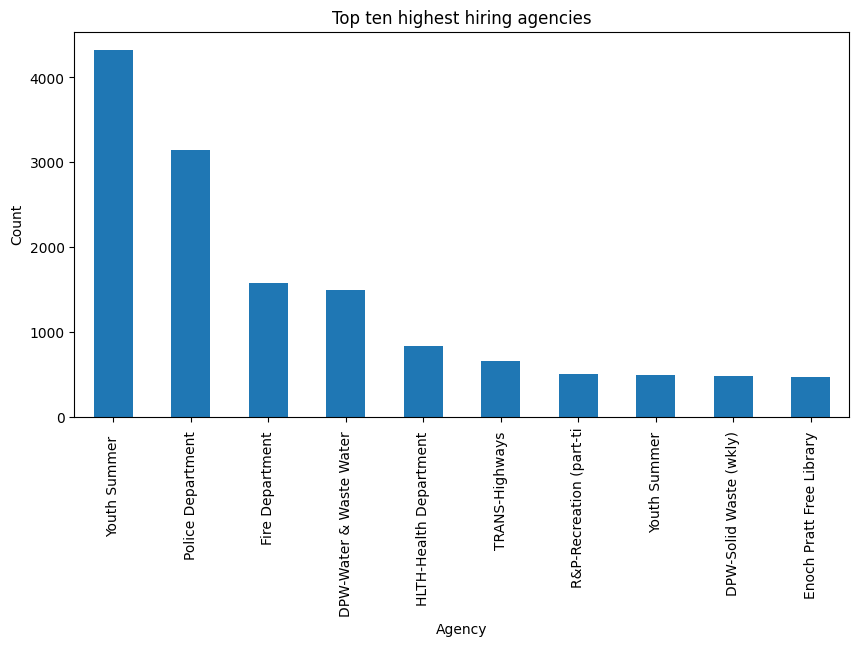

In [27]:
plt.figure(figsize=(10,5))
final.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Count")
plt.title("Top ten highest hiring agencies")
plt.show()

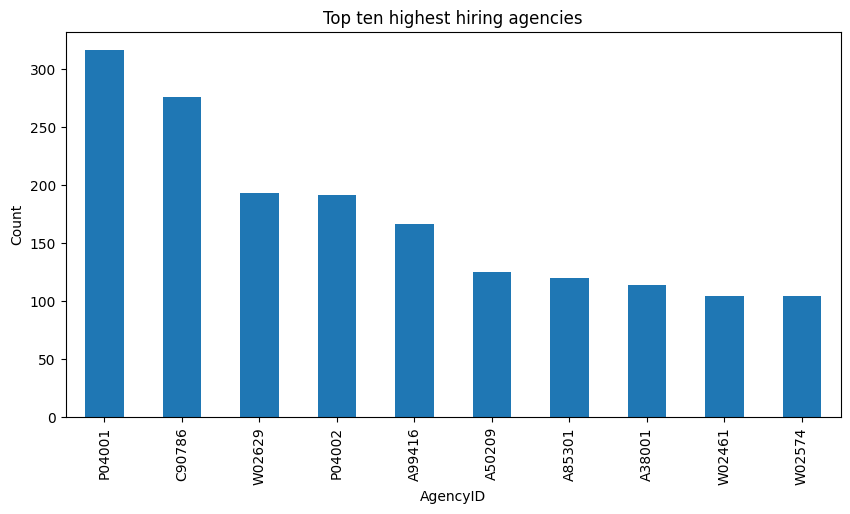

In [28]:
plt.figure(figsize=(10,5))
final.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Count")
plt.title("Top ten highest hiring agencies")
plt.show()

<Axes: xlabel='Year', ylabel='AnnualSalary'>

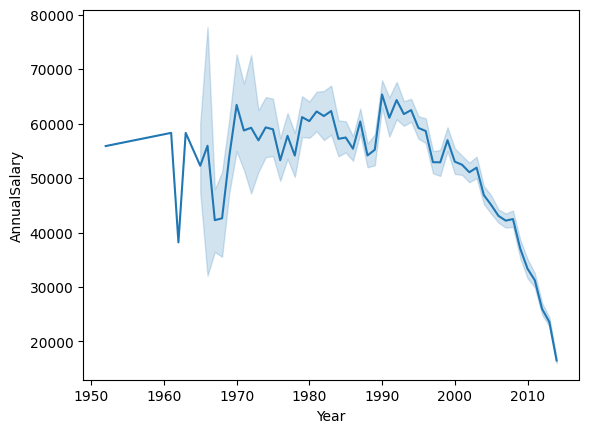

In [29]:
#Annual Salary Distribution over the years
sns.lineplot(x=final['Year'],y=final['AnnualSalary'])

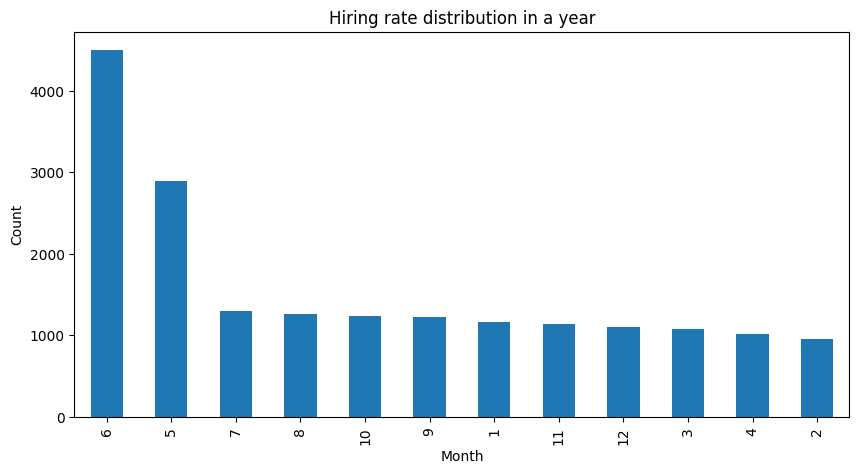

In [30]:
#Month with highest hiring rate 
plt.figure(figsize=(10,5))
final.groupby(['Month'])['Name'].count().sort_values(ascending=False).head(12).plot.bar()
plt.ylabel("Count")
plt.title("Hiring rate distribution in a year")
plt.show()

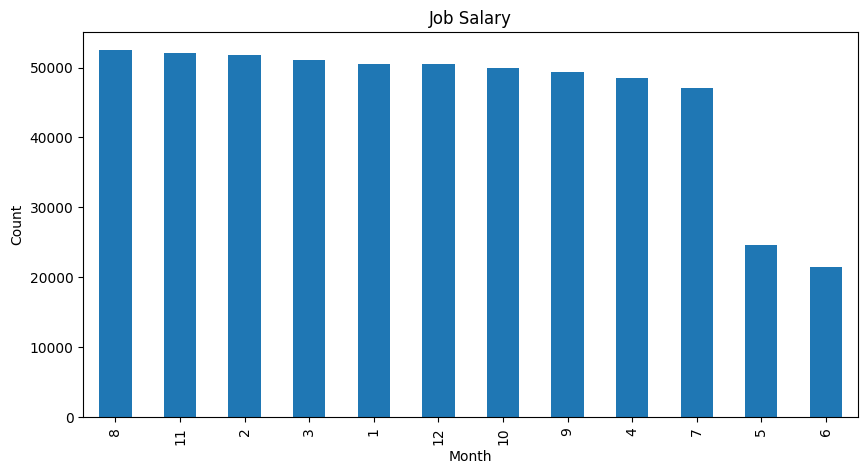

In [31]:
#Month with highest salary 
plt.figure(figsize=(10,5))
final.groupby(['Month'])['AnnualSalary'].mean().sort_values(ascending=False).head(12).plot.bar()
plt.ylabel("Count")
plt.title("Job Salary")
plt.show()

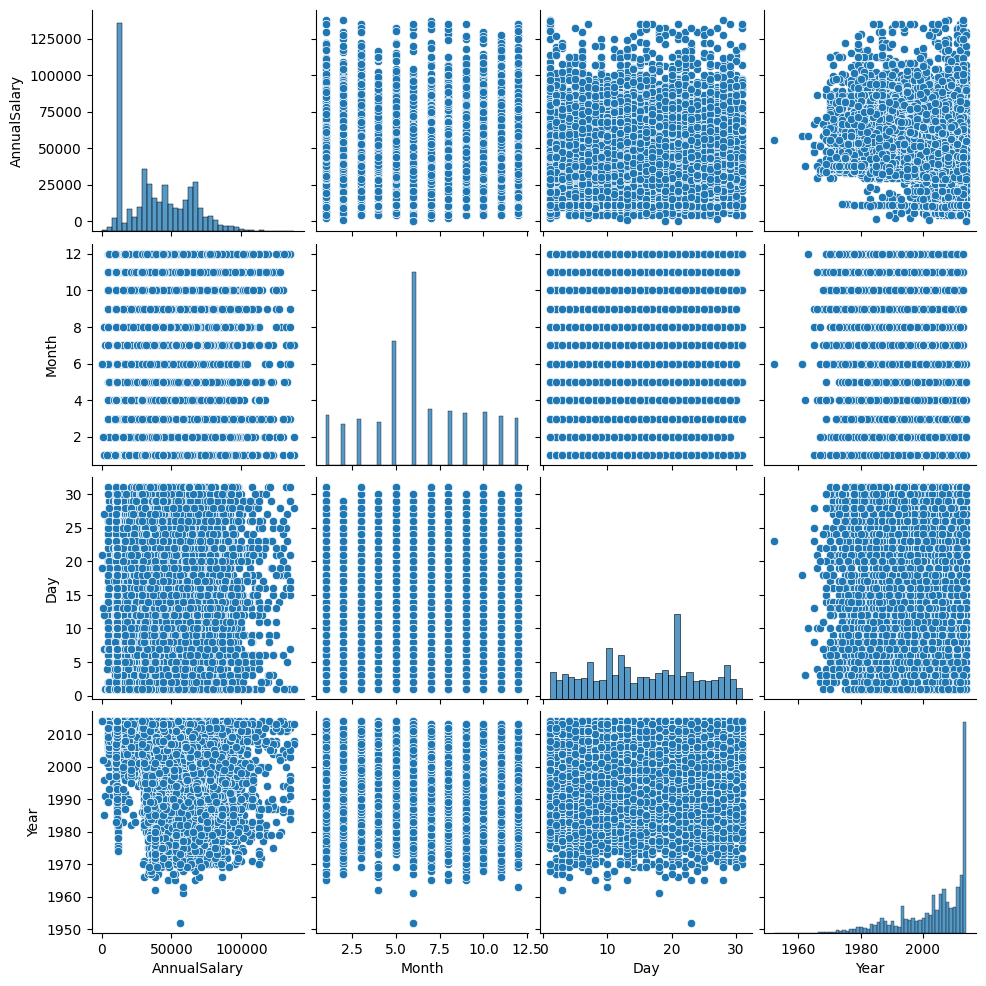

In [32]:
#Multivariable Analysis
sns.pairplot(final)

<Axes: >

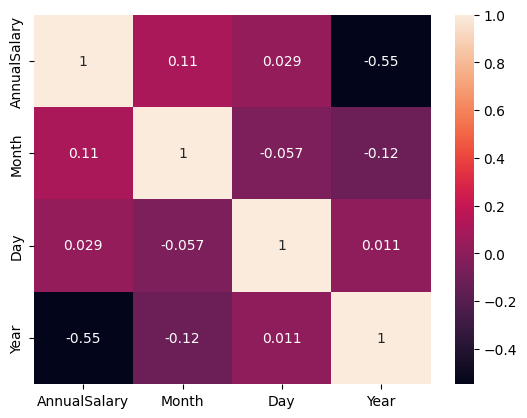

In [33]:
#Correlation Analysis
sns.heatmap(final.select_dtypes(include="number").corr(),annot=True)

In [34]:
final.select_dtypes(include="number").corr()

,AnnualSalary,Month,Day,Year
AnnualSalary,1.000000,0.108629,0.029401,-0.549410
Month,0.108629,1.000000,-0.057459,-0.123800
Day,0.029401,-0.057459,1.000000,0.011292
Year,-0.549410,-0.123800,0.011292,1.000000


In [35]:
## Categorical Coding - Mean Encoding

In [36]:
mean_job=final.groupby(['JobTitle'])['AnnualSalary'].mean()
mean_job

JobTitle
911 LEAD OPERATOR              47886.000000
911 OPERATOR                   42835.743590
911 OPERATOR SUPERVISOR        54797.500000
ACCOUNT EXECUTIVE              42960.000000
ACCOUNTANT I                   46316.642857
                                   ...     
ZONING ADMINISTRATOR           82100.000000
ZONING APPEALS ADVISOR BMZA    59274.000000
ZONING ENFORCEMENT OFFICER     62000.000000
ZONING EXAMINER I              43674.000000
ZONING EXAMINER II             53568.000000
Name: AnnualSalary, Length: 1067, dtype: float64

In [37]:
final['JobTitle']=final['JobTitle'].map(mean_job)
final

/var/folders/rk/p2f3sgbd0b3bn4zn4_gp26vw0000gn/T/ipykernel_32856/1514432637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['JobTitle']=final['JobTitle'].map(mean_job)


,Name,JobTitle,AgencyID,Agency,AnnualSalary,Month,Day,Year
0,"Aaron,Keontae E",11313.967200,W02200,Youth Summer,11310.0,6,10,2013
1,"Aaron,Patricia G",47443.500000,A03031,OED-Employment Dev,53428.0,10,24,1979
2,"Aaron,Petra L",69750.666667,A29005,States Attorneys Office,68300.0,9,25,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-Health Department,62000.0,7,23,2009
4,"Abbene,Anthony M",44531.160494,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,Youth Summer,11310.0,5,21,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,Youth Summer,11310.0,5,21,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,Police Department,43999.0,12,17,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,Police Department,44104.0,1,23,2013


In [38]:
final=final.drop(['Name'],axis=1)

In [39]:
final

,JobTitle,AgencyID,Agency,AnnualSalary,Month,Day,Year
0,11313.967200,W02200,Youth Summer,11310.0,6,10,2013
1,47443.500000,A03031,OED-Employment Dev,53428.0,10,24,1979
2,69750.666667,A29005,States Attorneys Office,68300.0,9,25,2006
3,57940.000000,A65026,HLTH-Health Department,62000.0,7,23,2009
4,44531.160494,A99416,Police Department,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,W02235,Youth Summer,11310.0,5,21,2014
18977,11313.967200,W02629,Youth Summer,11310.0,5,21,2014
18978,44531.160494,A99416,Police Department,43999.0,12,17,2013
18979,60588.139335,A99262,Police Department,44104.0,1,23,2013


In [40]:
mean_agency=final.groupby(['Agency'])['AnnualSalary'].mean()
mean_agency

Agency
COMP-Audits               65004.615385
COMP-Communication Ser    37876.966667
COMP-Comptroller's O      67637.625000
COMP-Real Estate          64279.875000
Circuit Court             56210.485214
                              ...     
TRANS-Towing              33920.215385
TRANS-Traffic             34172.489691
Youth Summer              11346.315789
Youth Summer              11310.270645
Youth Temp Adult          24202.971014
Name: AnnualSalary, Length: 65, dtype: float64

In [41]:
final['Agency']=final['Agency'].map(mean_agency)

In [42]:
final

,JobTitle,AgencyID,Agency,AnnualSalary,Month,Day,Year
0,11313.967200,W02200,11310.270645,11310.0,6,10,2013
1,47443.500000,A03031,51495.424242,53428.0,10,24,1979
2,69750.666667,A29005,64874.560224,68300.0,9,25,2006
3,57940.000000,A65026,39980.900360,62000.0,7,23,2009
4,44531.160494,A99416,61481.005417,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,W02235,11310.270645,11310.0,5,21,2014
18977,11313.967200,W02629,11346.315789,11310.0,5,21,2014
18978,44531.160494,A99416,61481.005417,43999.0,12,17,2013
18979,60588.139335,A99262,61481.005417,44104.0,1,23,2013


In [43]:
mean_agencyid=final.groupby(['AgencyID'])['AnnualSalary'].mean()

In [44]:
final['AgencyID']=final['AgencyID'].map(mean_agencyid)
final

,JobTitle,AgencyID,Agency,AnnualSalary,Month,Day,Year
0,11313.967200,11310.000000,11310.270645,11310.0,6,10,2013
1,47443.500000,46667.000000,51495.424242,53428.0,10,24,1979
2,69750.666667,65926.133333,64874.560224,68300.0,9,25,2006
3,57940.000000,48071.851064,39980.900360,62000.0,7,23,2009
4,44531.160494,44012.307229,61481.005417,43999.0,7,24,2013
...,...,...,...,...,...,...,...
18976,11313.967200,11310.000000,11310.270645,11310.0,5,21,2014
18977,11313.967200,11310.000000,11346.315789,11310.0,5,21,2014
18978,44531.160494,44012.307229,61481.005417,43999.0,12,17,2013
18979,60588.139335,60203.340426,61481.005417,44104.0,1,23,2013


In [45]:
#Model Building 

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
train,test=train_test_split(final,test_size=0.2,random_state=40)

In [48]:
y_train=train.pop('AnnualSalary') 
x_train=train

In [49]:
y_test=test.pop('AnnualSalary')
x_test=test

In [50]:
y_train

7642     67288.0
4899     36887.0
6525     11310.0
10668    29494.0
8828     27808.0
          ...   
11615    49668.0
16156    41202.0
14589    11310.0
14643    44773.0
11673    82704.0
Name: AnnualSalary, Length: 15108, dtype: float64

In [51]:
x_train

,JobTitle,AgencyID,Agency,Month,Day,Year
7642,43420.383333,58304.555556,70879.869663,10,29,1973
4899,37750.307692,57531.300000,42565.513078,2,11,2008
6525,11313.967200,11310.000000,11310.270645,6,19,2013
10668,21570.423841,53425.912281,44092.921659,6,4,2014
8828,28019.000000,57318.900000,61481.005417,1,23,2014
...,...,...,...,...,...,...
11615,61887.457627,54165.304348,44092.921659,2,13,2012
16156,41202.000000,44320.250000,39950.622030,6,9,2014
14589,11313.967200,11310.000000,11310.270645,6,12,2012
14643,60588.139335,57363.487805,61481.005417,9,26,2011


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])

In [54]:
x_train

,JobTitle,AgencyID,Agency,Month,Day,Year
7642,0.165190,0.850517,1.502119,1.234739,1.571928,-2.995648
4899,-0.068712,0.815681,0.151586,-1.483279,-0.571617,0.375314
6525,-1.159263,-1.266644,-1.339221,-0.124270,0.381070,0.856880
10668,-0.736164,0.630729,0.224440,-0.124270,-1.405217,0.953194
8828,-0.470147,0.806112,1.053814,-1.823031,0.857413,0.953194
...,...,...,...,...,...,...
11615,0.926993,0.664039,0.224440,-1.483279,-0.333445,0.760567
16156,0.073677,0.220508,0.026861,-0.124270,-0.809788,0.953194
14589,-1.159263,-1.266644,-1.339221,-0.124270,-0.452531,0.760567
14643,0.873394,0.808121,1.053814,0.894987,1.214670,0.664254


In [55]:
x_test[x_test.columns]=scaler.fit_transform(x_test[x_test.columns])
x_test

,JobTitle,AgencyID,Agency,Month,Day,Year
8116,-0.337661,-0.225668,0.127076,-1.140200,-0.676243,0.960034
12921,-1.174119,-1.286494,-1.371502,-0.129988,-0.436279,0.768185
4004,0.856752,1.133209,1.034006,0.543487,-0.676243,0.288561
10824,0.125074,0.176954,0.432324,0.543487,1.363444,-0.286987
9512,1.379931,1.443921,0.432324,-0.129988,-1.396132,0.768185
...,...,...,...,...,...,...
16417,3.091357,-0.381985,-0.412378,-0.129988,-1.036187,-3.164726
8485,0.630554,0.150354,0.127076,-0.129988,1.603408,-1.629932
3085,1.751339,1.387403,1.484649,-0.466725,0.523573,-1.246233
11816,-0.101478,0.272671,-0.218125,1.216962,-0.796224,-0.670685


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression()

In [58]:
reg=lr.fit(x_train,y_train)

In [59]:
y_pred=reg.predict(x_test)

In [60]:
y_pred

array([29234.16338847, 10605.9975065 , 59117.5420147 , ...,
       82249.90330949, 39601.20928108, 76473.11188939])

In [61]:
y_test

8116     30014.0
12921    11310.0
4004     60004.0
10824    44190.0
9512     71600.0
          ...   
16417    96500.0
8485     55100.0
3085     82592.0
11816    37339.0
18493    78897.0
Name: AnnualSalary, Length: 3777, dtype: float64

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9639076918145555

In [63]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
model=dr.fit(x_train,y_train)
y_pred_dr=model.predict(x_test)

In [64]:
r2_score(y_pred_dr,y_test)

0.9443640542468822

In [65]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [66]:
rfr_train=rfr.fit(x_train,y_train)
y_pred_rfr=rfr_train.predict(x_test)

In [67]:
r2_score(y_pred_rfr,y_test)

0.9701411299239738

In [68]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [70]:
from xgboost.sklearn import XGBRegressor

In [71]:
xgb=XGBRegressor()
xbg_train=xgb.fit(x_train,y_train)
y_pred_xgb=xbg_train.predict(x_test)

In [72]:
r2_score(y_pred_xgb,y_test)

0.9641058604462467